<a href="https://colab.research.google.com/github/hyelog/2022_Samsung_DL/blob/main/%5BAI_Essential%5D_2%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 인공지능

## 03-001 모듈 설정

In [ ]:
%%capture
!pip install JAEN -qU

In [ ]:
# 모듈 설정
import torch
from JAEN.utils import plot_activation_function

## 03-002 시그모이드 활성화 함수 구현 및 시각화

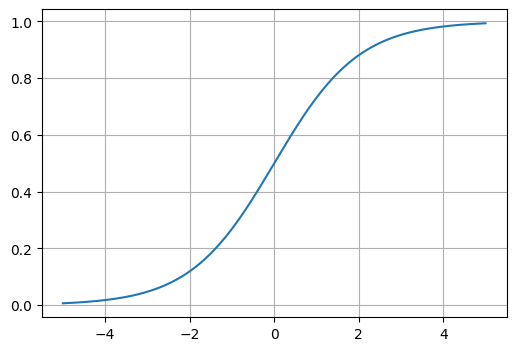

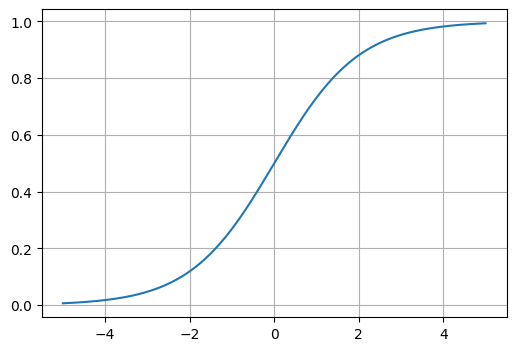

In [ ]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

plot_activation_function(sigmoid)
plot_activation_function(torch.sigmoid)

## 03-003 Tanh 활성화 함수 구현 및 시각화

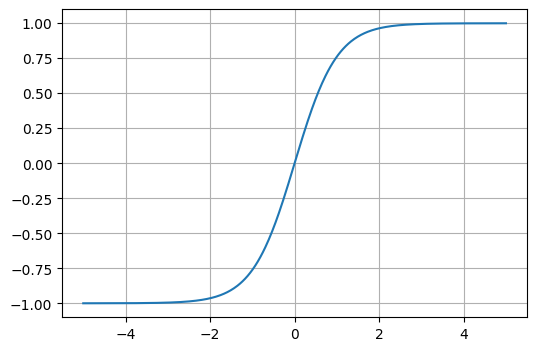

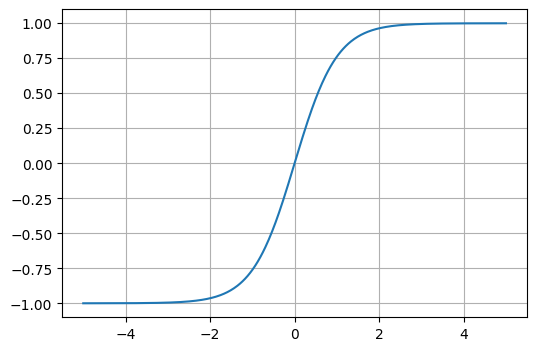

In [ ]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plot_activation_function(tanh)
plot_activation_function(torch.tanh)

## 03-004 ReLU 활성화 함수 구현 및 시각화

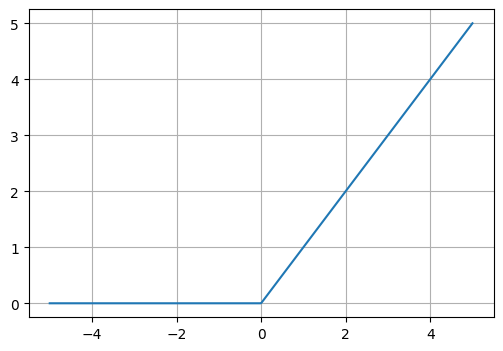

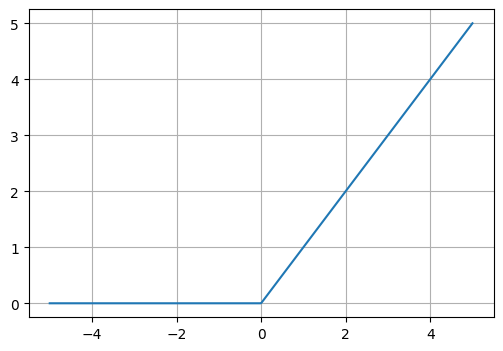

In [ ]:
def relu(x):
    return torch.max(torch.tensor(0.0), x)

plot_activation_function(relu)
plot_activation_function(torch.relu)

## 03-005 Leaky ReLU 활성화 함수 구현 및 시각화

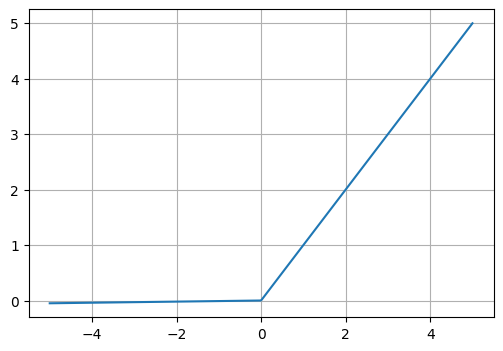

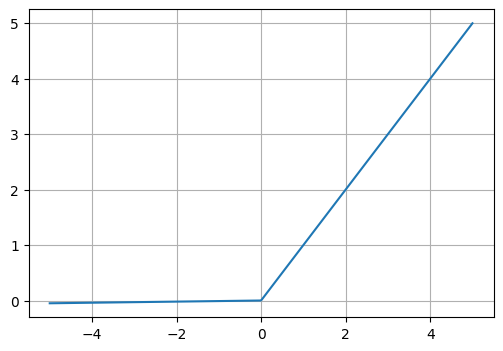

In [ ]:
def leaky_relu(x, alpha=0.01):
    return torch.max(x, alpha * x)

plot_activation_function(leaky_relu)
plot_activation_function(torch.nn.functional.leaky_relu)

## 03-006 ELU 활성화 함수 구현 및 시각화

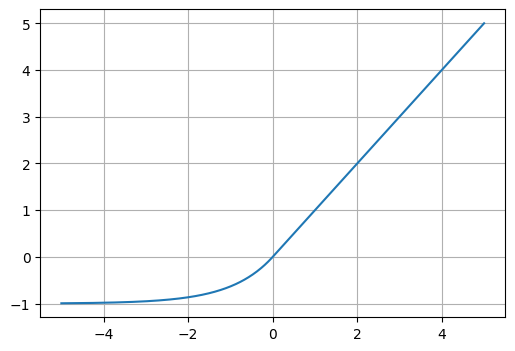

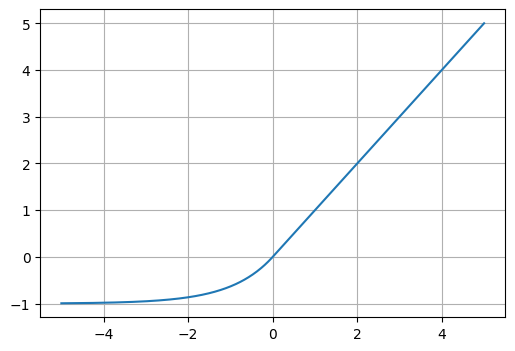

In [ ]:
def elu(x, alpha=1.0):
    return torch.where(x > 0, x, alpha * (torch.exp(x) - 1))

plot_activation_function(elu)
plot_activation_function(torch.nn.functional.elu)

## 03-007 requires_grad=True로 설정된 텐서 생성

In [ ]:
# requires_grad=True로 설정된 텐서 생성
x = torch.tensor([2.0, 3.0], requires_grad=True)
x

tensor([2., 3.], requires_grad=True)

## 03-008 텐서의 연산 및 역전파 수행

In [ ]:
# 텐서의 연산
y = x ** 2  # y = [4, 9]
z = y.sum()  # z = 13

# 역전파 수행
z.backward()

## 03-009 텐서의 기울기(gradient) 계산

In [ ]:
# x에 대한 z의 그래디언트 (z가 x에 대해 어떻게 변화하는지를 계산, 편미분 수행)
x.grad  # 출력: tensor([4., 6.])

# z = x1^2 + x2^2
# dz/dx1 = 2 * x1 = 2 * 2 = 4
# dz/dx2 = 2 * x2 = 2 * 3 = 6

tensor([4., 6.])

## 03-010 DataLoader와 Dataset 모듈 임포트

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

## 03-011 커스텀 데이터셋 클래스 구현

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y

## 03-012 커스텀 데이터셋과 DataLoader 생성

In [ ]:
# 예시 데이터
data = torch.randn(100, 3)  # 100개의 샘플, 각 샘플은 3차원 벡터
labels = torch.randint(0, 2, (100,))  # 이진 분류를 위한 100개의 레이블

# 데이터셋 및 DataLoader 생성
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=3)

## 03-013 DataLoader에서 배치 조회

In [ ]:
# DataLoader에서 모든 배치를 리스트로 변환
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[0]  # 첫번째 배치 조회
batch_data, batch_labels

(tensor([[ 1.0909,  0.0198, -1.0844],
         [ 1.4852, -1.4007,  1.2409],
         [ 0.0689, -0.6184,  1.6675]]),
 tensor([1, 1, 1]))

## 03-014 DataLoader에서 마지막 배치 조회

In [ ]:
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-1.4504, -1.5083,  0.3456]]), tensor([1]))

## 03-015 DataLoader에서 변경된 배치 크기로 마지막 배치 조회

In [ ]:
dataloader = DataLoader(dataset, batch_size=7)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-0.7761,  0.6400,  0.6252],
         [-1.4504, -1.5083,  0.3456]]),
 tensor([1, 1]))

## 03-016 셔플된 DataLoader에서 마지막 배치 조회

In [ ]:
dataloader = DataLoader(dataset, batch_size=7, shuffle=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[ 1.3712,  0.0050,  0.8458],
         [ 0.3265, -0.7286,  0.2626]]),
 tensor([1, 1]))

## 03-017 마지막 배치를 버리는 DataLoader에서 마지막 배치 조회

In [ ]:
dataloader = DataLoader(dataset, batch_size=7, shuffle=True, drop_last=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-0.0811,  0.4355, -0.2338],
         [ 0.2561, -0.5321,  0.2262],
         [ 0.0689, -0.6184,  1.6675],
         [-0.7192, -1.5067, -0.3286],
         [-1.4570,  0.2679, -1.8600],
         [-0.1096, -0.7793, -0.2325],
         [-0.8914, -1.1717,  0.6273]]),
 tensor([1, 1, 1, 1, 1, 0, 1]))

## 연습문제-03-001 커스텀 데이터셋과 DataLoader 생성

In [ ]:
# 새로운 랜덤 데이터 생성
data = torch.randn(150, 4)  # 150개의 샘플, 각 샘플은 4차원 벡터
labels = torch.randint(0, 3, (150,))  # 3개의 클래스로 분류되는 150개의 레이블

# 커스텀 데이터셋과 DataLoader 생성
# 커스텀 데이터셋 클래스는 03-019 재활용
dataset = CustomDataset(data, labels)

# 미니 배치 크기는 5
dataloader = DataLoader(dataset, batch_size=5)

## 연습문제-03-002 DataLoader에서 배치 조회

In [ ]:
# DataLoader에서 모든 배치를 리스트로 변환
all_batchs = list(dataloader)

# 첫 번째 배치 조회
batch_data, batch_labels = all_batchs[0]
batch_data, batch_labels

(tensor([[-1.2150,  0.4003, -0.9075, -0.0312],
         [-0.4307,  0.5623, -0.4154, -0.8164],
         [-1.0593,  0.7474, -1.2273,  1.4064],
         [ 1.2297, -0.5979,  0.4777,  0.4492],
         [ 0.4031, -1.5450,  0.5085, -2.1014]]),
 tensor([1, 0, 1, 2, 2]))

## 연습문제-03-003 DataLoader에서 마지막 배치 조회 (새로운 배치 크기)

In [ ]:
# DataLoader에서 배치 크기를 7로 설정
dataloader = DataLoader(dataset, batch_size=7)

# DataLoader에서 마지막 배치 조회
all_batchs = list(dataloader)
batch_data, batch_labels = all_batchs[-1]
batch_data, batch_labels

(tensor([[-1.2281, -0.2146, -0.8157,  0.1821],
         [-1.6919,  0.2926,  1.0438, -2.2321],
         [ 0.4799,  0.1424, -1.1109, -0.3397]]),
 tensor([0, 0, 2]))

## 연습문제-03-004 셔플된 DataLoader에서 마지막 배치 조회

In [ ]:
# DataLoader에서 shuffle=True로 설정하여 셔플된 데이터 로드
dataloader = DataLoader(dataset, batch_size=7, shuffle=True)

# 셔플된 DataLoader에서 마지막 배치 조회
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]
batch_data, batch_labels

(tensor([[ 0.7496,  0.8769, -0.7881,  1.5798],
         [-0.7636, -0.3624,  1.1014, -1.6263],
         [-0.6294,  0.4326, -0.0151,  0.9353]]),
 tensor([1, 2, 0]))

## 연습문제-03-005 drop_last가 설정된 DataLoader에서 마지막 배치 조회

In [ ]:
# DataLoader에서 batch_size=7, shuffle=True, drop_last=True로 설정하여 셔플된 데이터 로드
dataloader = DataLoader(dataset, batch_size=7, shuffle=True, drop_last=True)

# 셔플된 DataLoader에서 마지막 배치 조회
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]
batch_data, batch_labels

(tensor([[-1.6919,  0.2926,  1.0438, -2.2321],
         [-0.3410, -1.0396,  0.8561, -1.6737],
         [ 0.5392, -0.9512,  0.8268, -0.0376],
         [ 0.4715, -2.0620, -0.1092, -0.3741],
         [ 0.7123,  0.4675, -0.3768, -0.3093],
         [ 1.6679,  1.0027, -1.5017,  0.4702],
         [-0.0924, -0.3346,  0.4537,  1.5001]]),
 tensor([0, 1, 2, 0, 1, 0, 0]))

# 04. 심층신경망(DNN)

## 04-001 PyTorch 및 관련 모듈 임포트와 device 설정

In [ ]:
%%capture
!pip install JAEN -qU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터 로더 정의
from JAEN.datasets import load_titanic
train_loader, test_loader = load_titanic()

## 04-002 nn.Sequential 기반 신경망 모델 구성

In [ ]:
model = nn.Sequential(
    nn.Linear(7, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

# 모델 인스턴스 생성
model.to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─ReLU: 1-2                              [32, 32]                  --
├─Linear: 1-3                            [32, 1]                   33
├─Sigmoid: 1-4                           [32, 1]                   --
Total params: 289
Trainable params: 289
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

## 04-003 nn.Module 기반 신경망 모델 구성

In [ ]:
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# 모델 인스턴스 생성
model = DNN().to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
DNN                                      [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─ReLU: 1-2                              [32, 32]                  --
├─Linear: 1-3                            [32, 1]                   33
├─Sigmoid: 1-4                           [32, 1]                   --
Total params: 289
Trainable params: 289
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

## 04-004 모델 학습 함수 구현

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # 모델을 학습 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수

    for datas, labels in train_loader: # 미니 배치 별 파라미터 업데이트 수행
        datas, labels = datas.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

        # 순전파
        outputs = model(datas)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 기울기 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()

        # 파라미터 업데이트
        optimizer.step()

        # 손실 누적
        running_loss += loss.item()

    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(train_loader)

## 04-005 모델 평가 함수 구현

In [ ]:
# 평가 함수 정의
def evaluate(model, test_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수


    with torch.no_grad():  # 평가 중에는 기울기 계산을 하지 않음
        for datas, labels in test_loader: # 미니 배치 별 손실 계산
            datas, labels = datas.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

            # 순전파
            outputs = model(datas)

            # 손실 계산
            loss = criterion(outputs, labels)

            # 손실 누적
            running_loss += loss.item()


    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(test_loader)

## 04-006 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()  # 이진 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

## 04-007 학습 및 평가

In [ ]:
train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.5656066200007563 Test Loss : 0.44380485514799756
Epoch 2 Train Loss : 0.4402147194613581 Test Loss : 0.4275660514831543
Epoch 3 Train Loss : 0.43052703401316766 Test Loss : 0.42297201852003735
Epoch 4 Train Loss : 0.42570089257281757 Test Loss : 0.4156509538491567
Epoch 5 Train Loss : 0.42466413197310077 Test Loss : 0.4309269388516744
Epoch 6 Train Loss : 0.42460172591002093 Test Loss : 0.43376610179742175
Epoch 7 Train Loss : 0.4138742724190588 Test Loss : 0.4313415090243022
Epoch 8 Train Loss : 0.40282270571459894 Test Loss : 0.43135013182957965
Epoch 9 Train Loss : 0.40949264039164 Test Loss : 0.44047744075457257
Epoch 10 Train Loss : 0.40517999361390655 Test Loss : 0.44620154798030853
Epoch 11 Train Loss : 0.39203735473363294 Test Loss : 0.4409431616465251
Epoch 12 Train Loss : 0.3989253627217334 Test Loss : 0.43726952870686847
Epoch 13 Train Loss : 0.3943385404089223 Test Loss : 0.44394034147262573
Epoch 14 Train Loss : 0.3869937878587972 Test Loss : 0.44474

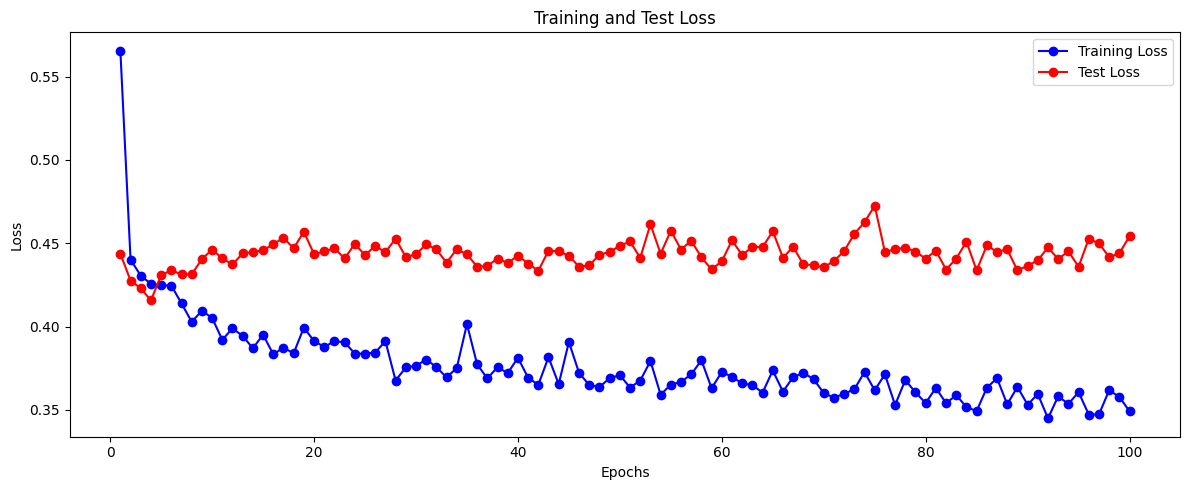

In [ ]:
plot_training_results(train_losses, test_losses)

## 04-008 드롭아웃을 포함한 모델 클래스 구현

In [ ]:
# 신경망 모델 정의 (Dropout 포함)
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.1)  # 10%의 드롭아웃 적용
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # 첫 번째 은닉층 뒤에 드롭아웃 적용
        x = self.fc2(x)  # 출력층에는 드롭아웃을 사용하지 않음
        x = self.sigmoid(x)
        return x

# 모델 인스턴스화
model = DNN().to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
DNN                                      [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─ReLU: 1-2                              [32, 32]                  --
├─Dropout: 1-3                           [32, 32]                  --
├─Linear: 1-4                            [32, 1]                   33
├─Sigmoid: 1-5                           [32, 1]                   --
Total params: 289
Trainable params: 289
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

## 04-009 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
criterion = nn.BCELoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.5319883667904398 Test Loss : 0.4441530456145604
Epoch 2 Train Loss : 0.460408760153729 Test Loss : 0.4149547169605891
Epoch 3 Train Loss : 0.4386786727801613 Test Loss : 0.4186825603246689
Epoch 4 Train Loss : 0.42194681841394177 Test Loss : 0.4197640021642049
Epoch 5 Train Loss : 0.41855904589528625 Test Loss : 0.43127799530824024
Epoch 6 Train Loss : 0.42523576967094256 Test Loss : 0.423197274406751
Epoch 7 Train Loss : 0.42954189297945605 Test Loss : 0.43890994787216187
Epoch 8 Train Loss : 0.417501792959545 Test Loss : 0.4257395267486572
Epoch 9 Train Loss : 0.41943340457004047 Test Loss : 0.4327610482772191
Epoch 10 Train Loss : 0.40163975954055786 Test Loss : 0.42981385191281635
Epoch 11 Train Loss : 0.4211848974227905 Test Loss : 0.4411513755718867
Epoch 12 Train Loss : 0.4063795655965805 Test Loss : 0.43954932192961377
Epoch 13 Train Loss : 0.4001057186852331 Test Loss : 0.4402851114670436
Epoch 14 Train Loss : 0.42588475540928217 Test Loss : 0.4434155275

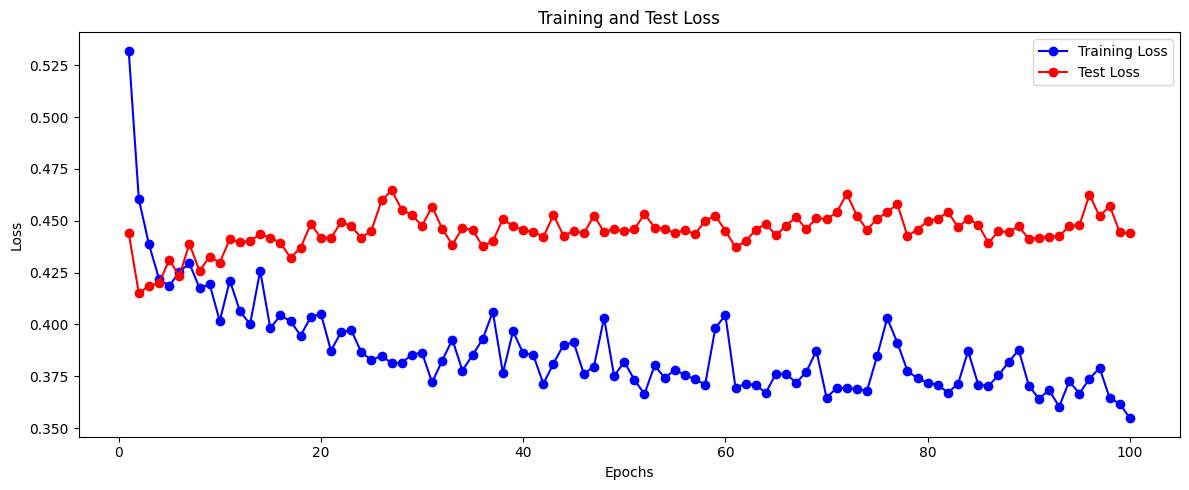

In [ ]:
plot_training_results(train_losses, test_losses)

## 04-010 Batch Normalization 및 Dropout 포함 모델 정의

In [ ]:
# 신경망 모델 정의 (Batch Normalization 및 Dropout 포함)
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.bn1 = nn.BatchNorm1d(32)  # 첫 번째 배치 정규화 레이어
        self.fc2 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.1)  # 10%의 드롭아웃 적용
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))  # 첫 번째 배치 정규화 + ReLU
        x = self.dropout(x)  # 드롭아웃 적용
        x = self.fc2(x)  # 출력층에는 배치 정규화 및 드롭아웃을 사용하지 않음
        x = self.sigmoid(x)
        return x

# 모델 인스턴스화
model = DNN().to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
DNN                                      [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─BatchNorm1d: 1-2                       [32, 32]                  64
├─ReLU: 1-3                              [32, 32]                  --
├─Dropout: 1-4                           [32, 32]                  --
├─Linear: 1-5                            [32, 1]                   33
├─Sigmoid: 1-6                           [32, 1]                   --
Total params: 353
Trainable params: 353
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

## 04-011 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
criterion = nn.BCELoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.5089982242687888 Test Loss : 0.4284474154313405
Epoch 2 Train Loss : 0.4679284264212069 Test Loss : 0.41975633303324383
Epoch 3 Train Loss : 0.4672508187915968 Test Loss : 0.4330798188845317
Epoch 4 Train Loss : 0.42990297986113507 Test Loss : 0.42371977865695953
Epoch 5 Train Loss : 0.42149185745612433 Test Loss : 0.42901503543059033
Epoch 6 Train Loss : 0.4380108118057251 Test Loss : 0.4316023538510005
Epoch 7 Train Loss : 0.433984641795573 Test Loss : 0.4339142292737961
Epoch 8 Train Loss : 0.4328329446523086 Test Loss : 0.43610118826230365
Epoch 9 Train Loss : 0.42707029373749444 Test Loss : 0.43340500195821124
Epoch 10 Train Loss : 0.39860487826492474 Test Loss : 0.43989266951878864
Epoch 11 Train Loss : 0.41658446451892023 Test Loss : 0.44188785552978516
Epoch 12 Train Loss : 0.4193753107734349 Test Loss : 0.4403093010187149
Epoch 13 Train Loss : 0.41094554442426434 Test Loss : 0.43614474932352704
Epoch 14 Train Loss : 0.42634717666584515 Test Loss : 0.4341

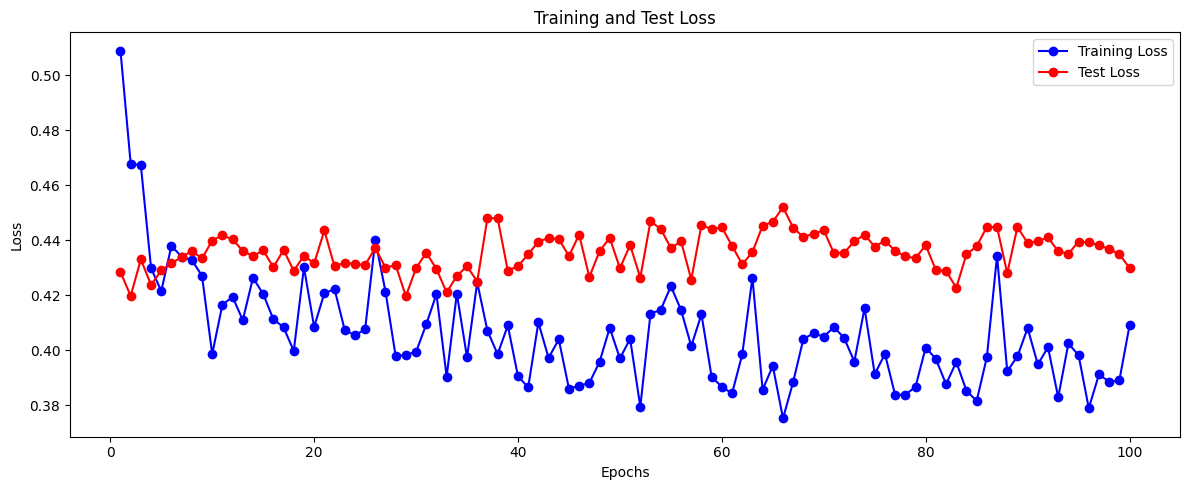

In [ ]:
plot_training_results(train_losses, test_losses)

## 04-012 L2 정칙화를 위한 옵티마이저 설정

In [ ]:
# L2 정칙화를 위한 옵티마이저 설정 (weight_decay가 L2 정칙화)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

In [ ]:
train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.39063202492568805 Test Loss : 0.43152936299641925
Epoch 2 Train Loss : 0.3863169848918915 Test Loss : 0.43200792372226715
Epoch 3 Train Loss : 0.3968045154343481 Test Loss : 0.4321810652812322
Epoch 4 Train Loss : 0.39559924148994946 Test Loss : 0.43179776271184284
Epoch 5 Train Loss : 0.38008571578108746 Test Loss : 0.43090352416038513
Epoch 6 Train Loss : 0.396260265422904 Test Loss : 0.4307214121023814
Epoch 7 Train Loss : 0.38081135050110193 Test Loss : 0.4318104137976964
Epoch 8 Train Loss : 0.40516393988028815 Test Loss : 0.43324466049671173
Epoch 9 Train Loss : 0.38609866409198096 Test Loss : 0.4302402635415395
Epoch 10 Train Loss : 0.3688677244860193 Test Loss : 0.4321441054344177
Epoch 11 Train Loss : 0.38388643316600635 Test Loss : 0.4337068051099777
Epoch 12 Train Loss : 0.4066145238669022 Test Loss : 0.4336554855108261
Epoch 13 Train Loss : 0.38690343499183655 Test Loss : 0.4345199267069499
Epoch 14 Train Loss : 0.38987758043019666 Test Loss : 0.43118

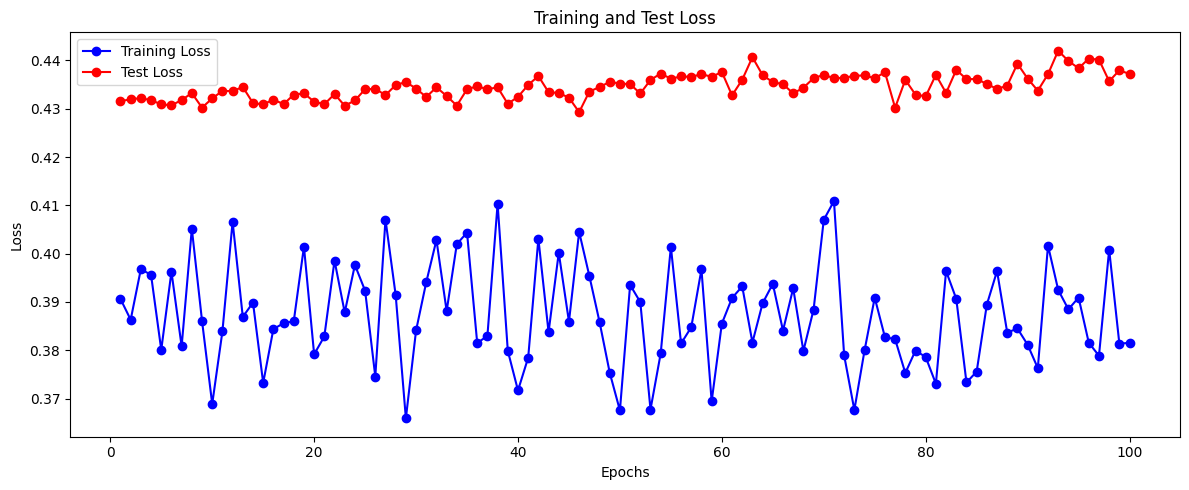

In [ ]:
plot_training_results(train_losses, test_losses)

## 연습문제-04-001 Sequential 방식으로 2차원 더미 데이터를 이용한 분류 모델 설계

In [ ]:
# nn.Sequential을 사용하여 model2 정의
model2 = nn.Sequential(
    nn.Linear(2, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
# 1. 첫 번째 레이어는 nn.Linear(2, 32)로 입력 차원이 2이고 출력 차원이 32인 완전연결층을 사용.

# 2. nn.ReLU()로 활성화 함수인 ReLU를 추가.

# 3. 두 번째 레이어는 nn.Linear(32, 16)으로 입력 차원이 32, 출력 차원이 16인 완전연결층을 추가.

# 4. 다시 nn.ReLU()로 활성화 함수 추가.

# 5. 마지막 레이어는 nn.Linear(16, 1)으로 입력 차원이 16, 출력 차원이 1인 완전연결층을 추가.

# 6. nn.Sigmoid()으로 출력을 확률 분포로 변환.
)
model2

model2.to(device)
summary(model2, (100, 2))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [100, 1]                  --
├─Linear: 1-1                            [100, 32]                 96
├─ReLU: 1-2                              [100, 32]                 --
├─Linear: 1-3                            [100, 16]                 528
├─ReLU: 1-4                              [100, 16]                 --
├─Linear: 1-5                            [100, 1]                  17
├─Sigmoid: 1-6                           [100, 1]                  --
Total params: 641
Trainable params: 641
Non-trainable params: 0
Total mult-adds (M): 0.06
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.04

## 연습문제-04-002 Module 방식으로 2차원 더미 데이터를 이용한 회귀 모델 설계

In [ ]:
# nn.Module을 상속받아 model3 정의

class DNN(nn.Module):
# 1. __init__ 메서드에서 세 개의 레이어(layer1, layer2, layer3)를 정의.
#    각 레이어는 nn.Linear를 사용하여 정의되며, 첫 번째 레이어는 입력이 2차원, 출력이 64차원.
# 2. 두 번째 레이어는 입력이 64차원, 출력이 32차원.
# 3. 세 번째 레이어는 입력이 32차원, 출력이 1차원으로 회귀 문제에 맞게 설정.
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()


# 4. forward 메서드에서 입력 데이터가 layer1 -> ReLU -> layer2 -> ReLU -> layer3 순으로 통과.
#    마지막 출력은 회귀 문제이므로 활성화 함수 없이 그대로 반환.

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model3 = DNN().to(device)
model3
summary(model3, (100, 2))

Layer (type:depth-idx)                   Output Shape              Param #
DNN                                      [100, 1]                  --
├─Linear: 1-1                            [100, 64]                 192
├─ReLU: 1-2                              [100, 64]                 --
├─Linear: 1-3                            [100, 32]                 2,080
├─ReLU: 1-4                              [100, 32]                 --
├─Linear: 1-5                            [100, 1]                  33
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
Total mult-adds (M): 0.23
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.01
Estimated Total Size (MB): 0.09

Encoder 설계
* 3개의 선형 계층(nn.Linear)을 사용하며, 차원은 다음과 같이 점진적으로 축소
** 첫 번째 레이어: 784 → 256
** 두 번째 레이어: 256 → 64
** 세 번째 레이어: 64 → 8
* 각 레이어의 출력 뒤에 활성화 함수로 ReLU를 사용

Decoder 설계
* 3개의 선형 계층(nn.Linear)을 사용하며, 차원은 다음과 같이 점진적으로 축소
** 첫 번째 레이어: 8 → 64
** 두 번째 레이어: 64 → 256
** 세 번째 레이어: 256 → 784.
* 첫 번재 두 번째 레이어의 출력 뒤에 활성화 함수로 ReLU를 사용
* 세 번째 레이어의 활성화 함수로 Sigmoid를 사용

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 8)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 256)
        self.fc3 = nn.Linear(256, 784)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = AutoEncoder().to(device)
model


AutoEncoder(
  (encoder): Encoder(
    (fc1): Linear(in_features=784, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=64, bias=True)
    (fc3): Linear(in_features=64, out_features=8, bias=True)
    (relu): ReLU()
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=8, out_features=64, bias=True)
    (fc2): Linear(in_features=64, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=784, bias=True)
    (relu): ReLU()
    (sigmoid): Sigmoid()
  )
)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses = []
test_losses = []

num_epoch = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epoch):
    model.train()
    tran_loss = 0
    for images, _ in train_loader:
        images = images. reshape(-1, 28*28).to(device)
        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epoch}], Loss: {train_loss / len(train_loader):.4f}")

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

Layer (type:depth-idx)                   Output Shape              Param #
Decoder                                  [100, 784]                --
├─Linear: 1-1                            [100, 64]                 576
├─ReLU: 1-2                              [100, 64]                 --
├─Linear: 1-3                            [100, 256]                16,640
├─ReLU: 1-4                              [100, 256]                --
├─Linear: 1-5                            [100, 784]                201,488
├─Sigmoid: 1-6                           [100, 784]                --
Total params: 218,704
Trainable params: 218,704
Non-trainable params: 0
Total mult-adds (M): 21.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.88
Params size (MB): 0.87
Estimated Total Size (MB): 1.76

# 05. 합성곱신경망 (CNN)

In [ ]:
%%capture
!pip install JAEN -qU

## 05-001 2D 컨볼루션 출력 크기 계산 함수 구현

In [ ]:
def conv2d_output_size(input_size, kernel_size, stride=1, padding=0):
    height, width = input_size

    # Convolution 공식 적용
    out_height = (height + 2 * padding - kernel_size) // stride + 1
    out_width = (width + 2 * padding - kernel_size) // stride + 1

    return out_height, out_width

## 05-002 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (26, 26)


## 05-003 패딩을 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (28, 28)


## 05-004 스트라이드를 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (13, 13)


## 05-005 스트라이드 및 패딩을 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (14, 14)


## 05-006 PyTorch 및 관련 모듈 임포트와 device 설정

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## 05-007 FashionMNIST 데이터 변환 및 정규화

In [ ]:
# FashionMNIST 데이터 변환 (이미지를 텐서로 변환하고 [0, 1] 범위로 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
])

## 05-008 FashionMNIST 학습 및 테스트 데이터셋 로드

In [ ]:
# 학습 및 테스트 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|█████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:10<00:00, 2.49MB/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 107kB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:02<00:00, 1.98MB/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



## 05-009 데이터 로더 생성

In [ ]:
# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## 05-010 CNN 모델 클래스 정의

In [ ]:
# Sequential로 모델 정의
model = nn.Sequential(
    # 첫 번째 Conv + ReLU + MaxPool
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # 두 번째 Conv + ReLU + MaxPool
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Flatten
    nn.Flatten(),

    # 첫 번째 Fully Connected + ReLU
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),

    # 두 번째 Fully Connected (출력층)
    nn.Linear(128, 10)
)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─ReLU: 1-2                              [64, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [64, 16, 14, 14]          --
├─Conv2d: 1-4                            [64, 32, 14, 14]          4,640
├─ReLU: 1-5                              [64, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [64, 32, 7, 7]            --
├─Flatten: 1-7                           [64, 1568]                --
├─Linear: 1-8                            [64, 128]                 200,832
├─ReLU: 1-9                              [64, 128]                 --
├─Linear: 1-10                           [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (M): 79.17
Input size (MB): 0.20
Forward/backward pass 

In [ ]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # 첫 번째 컨볼루션 레이어
        # 입력 채널: 1 (흑백 이미지), 출력 채널: 16, 커널 크기: 3x3, 패딩: 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)

        # 두 번째 컨볼루션 레이어
        # 입력 채널: 16, 출력 채널: 32, 커널 크기: 3x3, 패딩: 1
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # MaxPool 레이어 (다운샘플링)
        # 커널 크기: 2x2, 스트라이드: 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # 첫 번째 완전 연결 (Fully Connected) 레이어
        # 입력 크기: 32 * 7 * 7 (Conv2d 출력을 펼친 크기), 출력 크기: 128
        self.fc1 = nn.Linear(32 * 7 * 7, 128)

        # 두 번째 완전 연결 레이어
        # 입력 크기: 128, 출력 크기: 10 (클래스 개수)
        self.fc2 = nn.Linear(128, 10)

        # 활성화 함수
        self.relu = nn.ReLU()

    def forward(self, x):
        # 입력 데이터 크기: (batch_size, 1, 28, 28)

        # 첫 번째 Conv + ReLU + MaxPool
        # Conv 후 크기: (batch_size, 16, 28, 28)
        # MaxPool 후 크기: (batch_size, 16, 14, 14)
        x = self.pool(self.relu(self.conv1(x)))

        # 두 번째 Conv + ReLU + MaxPool
        # Conv 후 크기: (batch_size, 32, 14, 14)
        # MaxPool 후 크기: (batch_size, 32, 7, 7)
        x = self.pool(self.relu(self.conv2(x)))

        # Flatten: Conv 출력을 1차원 벡터로 펼침
        # Flatten 후 크기: (batch_size, 32 * 7 * 7)
        x = x.reshape(-1, 32 * 7 * 7)

        # 첫 번째 Fully Connected + ReLU
        # 출력 크기: (batch_size, 128)
        x = self.relu(self.fc1(x))

        # 두 번째 Fully Connected (출력층)
        # 출력 크기: (batch_size, 10)
        x = self.fc2(x)

        return x

# 모델 요약 출력
model = CNN().to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─ReLU: 1-2                              [64, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [64, 16, 14, 14]          --
├─Conv2d: 1-4                            [64, 32, 14, 14]          4,640
├─ReLU: 1-5                              [64, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [64, 32, 7, 7]            --
├─Linear: 1-7                            [64, 128]                 200,832
├─ReLU: 1-8                              [64, 128]                 --
├─Linear: 1-9                            [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (M): 79.17
Input size (MB): 0.20
Forward/backward pass size (MB): 9.70
Params size (MB): 0.83
Estimated Total Size (MB): 10.7

## 05-011 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.8566912162913951 Test Loss : 0.5779738997577861
Epoch 2 Train Loss : 0.5151377571448843 Test Loss : 0.5008982364918776
Epoch 3 Train Loss : 0.45389260083182786 Test Loss : 0.46750944169463626
Epoch 4 Train Loss : 0.4187832952562426 Test Loss : 0.43542839140649053
Epoch 5 Train Loss : 0.3953593972840035 Test Loss : 0.40623193163021354
Epoch 6 Train Loss : 0.37665516630545864 Test Loss : 0.39215675186199744
Epoch 7 Train Loss : 0.36244077615138054 Test Loss : 0.3743612648575169
Epoch 8 Train Loss : 0.35007598513224997 Test Loss : 0.36331950934829227
Epoch 9 Train Loss : 0.33853405873690334 Test Loss : 0.3583142114862515
Epoch 10 Train Loss : 0.32994521738115407 Test Loss : 0.35773599802688427


## 연습문제-05-001 (배치, 3, 32, 32) 입력을 받는 CNN 모델 설계 (Sequential 방식)

In [ ]:
# 이 모델은 이미지 분류를 위한 CNN 모델로, 세 개의 합성곱층(Convolutional Layer)과 완전 연결층(Fully Connected Layer)으로 구성됩니다.
# 입력 데이터는 (배치 크기, 3, 32, 32) 형태를 가지며, 다음과 같은 단계로 설계됩니다.

# 1. 첫 번째 합성곱층:
#    - 입력 채널: 3 (RGB 이미지)
#    - 출력 채널: 16
#    - 커널 크기: 3x3
#    - 패딩: 1 (출력 크기가 입력 크기와 동일하게 유지되도록 설정)
#    - 비선형성을 부여하기 위해 ReLU 활성화 함수 추가
#    - 공간 해상도를 축소하기 위해 Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)

# 2. 두 번째 합성곱층:
#    - 입력 채널: 16
#    - 출력 채널: 32
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수로 ReLU 적용
#    - Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)

# 3. 세 번째 합성곱층:
#    - 입력 채널: 32
#    - 출력 채널: 64
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - ReLU 활성화 함수 적용
#    - Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)

# 4. Flatten 레이어:
#    - 다차원 텐서를 이차원 텐서로 변환
#    - Conv 레이어와 Max Pooling을 거친 후 (배치 크기, 64, 4, 4) 형태의 텐서를 이차원 텐서로 변환 변환하여 fully connected layer에 입력

# 5. 첫 번째 완전 연결층:
#    - Conv 레이어 출력을 128차원 출력으로 변환
#    - ReLU 활성화 함수 추가

# 6. 최종 출력층:
#    - 10개의 클래스로 분류 (활성화 함수는 분류 목적에 따라 추가 설정 가능)


## 연습문제-05-002 (배치, 3, 224, 224) 입력을 받는 CNN 모델 설계 (Module 방식)

In [ ]:
# CNN 모델 설계 가이드

# 이 모델은 이미지 분류를 위한 CNN 모델로, 네 개의 합성곱층(Convolutional Layer)과 풀링층(Max Pooling Layer),
# 그리고 두 개의 완전 연결층(Fully Connected Layer)으로 구성됩니다.
# 입력 데이터는 (배치 크기, 3, 224, 224) 형태를 가지며, 다음과 같은 단계로 설계됩니다.

# 1. 첫 번째 합성곱층:
#    - 입력 채널: 3 (RGB 이미지)
#    - 출력 채널: 256
#    - 커널 크기: 3x3
#    - 패딩: 1 (출력 크기를 입력 크기와 동일하게 유지)
#    - 활성화 함수: ReLU를 사용하여 비선형성 부여
#    - 첫 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (112, 112))

# 2. 두 번째 합성곱층:
#    - 입력 채널: 256
#    - 출력 채널: 128
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 두 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (56, 56))

# 3. 세 번째 합성곱층:
#    - 입력 채널: 128
#    - 출력 채널: 64
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 세 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (28, 28))

# 4. 네 번째 합성곱층:
#    - 입력 채널: 64
#    - 출력 채널: 32
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 네 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (14, 14))

# 5. Flatten 레이어:
#    - 네 번째 풀링 이후의 다차원 텐서를 이차원 텐서로 변환하여 fully connected layer에 입력
#    - Conv 레이어와 풀링층을 거친 후 (32, 14, 14) 형태의 텐서를 이차원 텐서로 변환

# 6. 첫 번째 완전 연결층:
#    - Conv 레이어 출력을 낮은 차원(256)으로 줄임
#    - 활성화 함수: ReLU 사용

# 7. 두 번째 완전 연결층:
#    - 최종적으로 두 개의 클래스로 분류


## 05-012 JAEN 패키지에서 CNN 모델 불러오기

In [ ]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (64, 1, 28, 28))

Pretrained weights loaded successfully on cuda.


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          160
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    

## 05-013 기존 Conv Block 동결

In [ ]:
# 기존 Conv Block 동결
for param in model.conv_layers.parameters():
    param.requires_grad = False

## 05-014 새로운 Fully Connected Block 설정

In [ ]:
# 새로운 Fully Connected Block 설정
model.fc_layers = nn.Sequential(
    nn.Linear(32 * 7 * 7, 64),  # 첫 번째 은닉층
    nn.ReLU(),
    nn.Dropout(p=0.5),           # 드롭아웃 추가
    nn.Linear(64, 10)           # 출력층 (활성화 함수 없음)
)

# 디바이스 설정 (GPU 또는 CPU)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          (160)
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          (2,320)
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          (4,640)
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          (9,248)
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  

## 05-015 손실 함수 및 최적화 도구 정의와 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.9184559824497207 Test Loss : 0.535254947508976
Epoch 2 Train Loss : 0.5580318742024619 Test Loss : 0.4549265488697465
Epoch 3 Train Loss : 0.48623669368308237 Test Loss : 0.4188112210316263
Epoch 4 Train Loss : 0.44850601759483055 Test Loss : 0.39796151087921894
Epoch 5 Train Loss : 0.42214306129384904 Test Loss : 0.38026131575654265
Epoch 6 Train Loss : 0.4029718187254375 Test Loss : 0.37059153132377914
Epoch 7 Train Loss : 0.38900315288160403 Test Loss : 0.3603085174112563
Epoch 8 Train Loss : 0.3751396883938358 Test Loss : 0.3533905357312245
Epoch 9 Train Loss : 0.36324829924335356 Test Loss : 0.34696398732388856
Epoch 10 Train Loss : 0.35765811502298056 Test Loss : 0.34361342763065533


## 05-016 마지막 두 Conv 레이어만 학습하도록 설정

In [ ]:
# 마지막 두 Conv 레이어만 학습하도록 설정
for name, p in model.conv_layers.named_parameters():
    if name in ['5.weight', '5.bias', '7.weight', '7.bias']:
        p.requires_grad = True

## 05-017 손실 함수 및 최적화 도구 정의와 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.2562257457993178 Test Loss : 0.2900268730535439
Epoch 2 Train Loss : 0.2526044048654881 Test Loss : 0.28791431754020747
Epoch 3 Train Loss : 0.24866115048464174 Test Loss : 0.2857395520160912
Epoch 4 Train Loss : 0.24415511572793094 Test Loss : 0.2849016143305666
Epoch 5 Train Loss : 0.24020394629665784 Test Loss : 0.28296955155244297
Epoch 6 Train Loss : 0.23411783284501736 Test Loss : 0.2842044304154671
Epoch 7 Train Loss : 0.23164488758439067 Test Loss : 0.2844553275425343
Epoch 8 Train Loss : 0.23067897598721834 Test Loss : 0.28208893815138536
Epoch 9 Train Loss : 0.22569878179349626 Test Loss : 0.2782272859387527
Epoch 10 Train Loss : 0.22397975082685953 Test Loss : 0.27871274133064566
